In [47]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
h = 0.5 # days
#h = 1.9 # days
transmission_coeff = 5e-9 # 1 / day person
latency_time = 1.0 # days
infectious_time = 5.0 # days

In [4]:
end_time = 60.0 # days
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

In [28]:
def seir_model():
    '''
    h = 0.5 days
    
    1. Total population = 100000000
    2. Susceptible population = 100000000 - 100000 - 1000000 = 98900000
    3. Exposed population = 0
    4. Infected population = 100000
    5. Recovered population = 1000000
    
    Return: array of susceptible, exposed, infected and recovered population
    '''
    s = np.zeros(num_steps + 1)
    #e = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    #e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6
    
    # h = step size
    for step in range(num_steps):
        s2e = h * transmission_coeff * s[step] * i[step]
        #e2i = h / latency_time * e[step]
        i2r = h / infectious_time * i[step]
        s[step+1] = s[step] - s2e
        #e[step+1] = e[step] + s2e - e2i
        #i[step+1] = i[step] + e2i - i2r
        i[step+1] = i[step] + s2e - i2r
        r[step+1] = r[step] + i2r
        
#     return s, e, i, r
    return s, i, r

# s, e, i, r = seir_model()
s, i, r = seir_model()

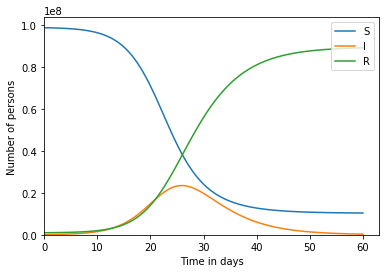

In [29]:
def plot_me():
    s_plot = plt.plot(times, s, label = 'S')
    #e_plot = plt.plot(times, e, label = 'E')
    i_plot = plt.plot(times, i, label = 'I')
    r_plot = plt.plot(times, r, label = 'R')
#     plt.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    plt.legend(('S', 'I', 'R'), loc = 'upper right')
    
    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(left = 0.)
    plt.ylim(bottom = 0.)
    
plot_me()

In [42]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

N_trajectories = 20

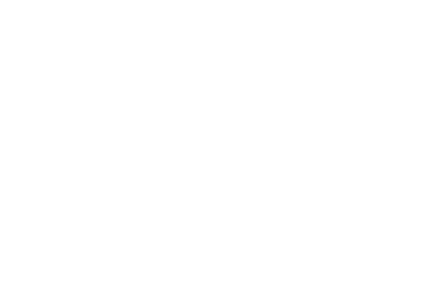

In [51]:
def lorentz_deriv(params, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    x,y,z = params
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

#Save as mp4. This requires mplayer or ffmpeg to be installed
#anim.save('lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()

### Dahlquist's test equation
 - $\frac{dx}{dt}$ = $-k * t$ , where k > 0
 - Every time interval, we are loosing a percentage of the current value
 - As t->$\infty$, solution will approach 0
 - k = large, decay faster
 - k = low, decay slower
 - For the Forward Euler to be stable, $h\lt\frac{2}{k}$

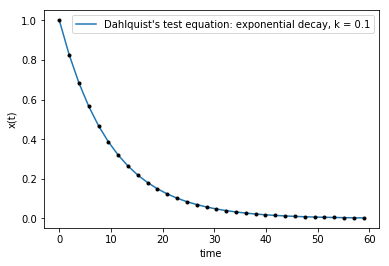

In [6]:
def model(x,t):
    k = 0.1
    dxdt = -k * x
    return dxdt

# initial condition
x0 = 1

# time points
t = times

# solve ODE
x = odeint(model,x0,t)

# plot results
plt.plot(t,x,label='Dahlquist\'s test equation: exponential decay, k = 0.1')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend(loc='best')
plt.plot(t,x, marker='.', color='k', linestyle='none')
plt.show()

In [35]:
def seir_model():
    '''
    h = 0.5 days
    
    1. Total population = 100000000
    2. Susceptible population = 100000000 - 100000 - 1000000 = 98900000
    3. Exposed population = 0
    4. Infected population = 100000
    5. Recovered population = 1000000
    
    Return: array of susceptible, exposed, infected and recovered population
    '''
    s = np.zeros(num_steps + 1)
    e = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6
    
    # h = step size
    for step in range(num_steps):
        p = ((1.0 + h / infectious_time) / (h * transmission_coeff) + i[step]) / (h / latency_time) - (s[step] + e[step]) / (1.0 + h / latency_time) 
        q = -((1.0 + h / infectious_time) / (h * transmission_coeff) * e[step] + (s[step] + e[step]) * i[step]) / ((1.0 + h / latency_time) * (h / latency_time))
        e[step + 1] = -0.5 * p + math.sqrt(0.25 * p * p - q)
        i[step + 1] = (i[step] + h / latency_time * e[step + 1]) / (1. + h / infectious_time)
        s[step + 1] = s[step] / (1. + h * transmission_coeff * i[step + 1])
        r[step + 1] = r[step] + h / infectious_time * i[step + 1]
        
    return s, e, i, r

s, e, i, r = seir_model()

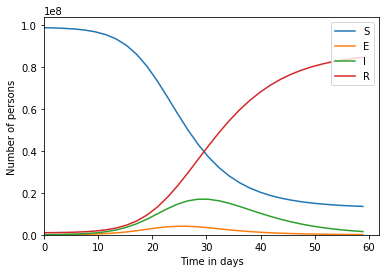

In [41]:
def plot_me():
    s_plot = plt.plot(times, s, label = 'S')
    e_plot = plt.plot(times, e, label = 'E')
    i_plot = plt.plot(times, i, label = 'I')
    r_plot = plt.plot(times, r, label = 'R')
    plt.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    
    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(left = 0.)
    plt.ylim(bottom = 0.)
    
plot_me()

#using odeint
https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/